In [40]:
!pip install --upgrade google-cloud-vision
import requests
import os
from google.cloud import vision
from PIL import Image
from IPython.display import display
from io import BytesIO




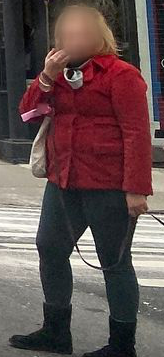

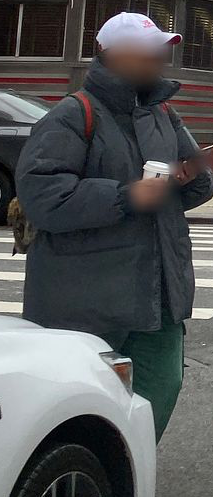

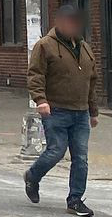

In [41]:
# Set up Mapillary API
app_access_token = 'MLY|6310491452334772|107429fea18eb315ad271426a58dc7a8'  # Replace with your actual client token
image_id = '158214102907935'
url = f'https://graph.mapillary.com/{image_id}?fields=id,thumb_2048_url&access_token={app_access_token}'

# Using headers is strongly recommended for user tokens
headers = {"Authorization": f"OAuth {app_access_token}"}
response = requests.get(url, headers=headers)
data = response.json()
image_url = data['thumb_2048_url']

# Download the image
image_data = requests.get(image_url).content

# Set up Google Cloud Vision API
google_credentials_path = '/Users/armen/Downloads/rare-style-384703-13acd7eaf49e.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = google_credentials_path  # Replace with the path to your credentials file
client = vision.ImageAnnotatorClient()

# Load the image into a Google Cloud Vision Image object
image = vision.Image(content=image_data)

# Make a request to the Cloud Vision API for object detection
response = client.object_localization(image=image)
objects = response.localized_object_annotations

# Find the bounding boxes for each person
person_bounding_boxes = [obj.bounding_poly.normalized_vertices for obj in objects if obj.name.lower() == 'person']


# Crop and display the image for each person

pil_image = Image.open(BytesIO(image_data))
width, height = pil_image.size

for i, person_bounding_box in enumerate(person_bounding_boxes):
    # Convert normalized vertices to pixel coordinates
    left = person_bounding_box[0].x * width
    top = person_bounding_box[0].y * height
    right = person_bounding_box[2].x * width
    bottom = person_bounding_box[2].y * height

    cropped_image = pil_image.crop((left, top, right, bottom))
    display(cropped_image)

if not person_bounding_boxes:
    print("There are no people in the photo.")

